In [1]:
from os import walk
import h5py
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import math
from adabelief_tf import AdaBeliefOptimizer
from PIL import Image
from os import walk
from skimage.transform import resize

In [6]:
TRAIN_PATH = 'ANTWERP/training/2020-05-28_ANTWERP_8ch.h5'

In [7]:
with h5py.File(TRAIN_PATH, 'r') as hf:
            #get the data
            a_group_key = list(hf.keys())[0]
            data = list(hf[a_group_key])

            # transform to appropriate numpy array 
            data = data[0:]
            data = np.stack(data, axis=0)

In [8]:
data[155, :, :, 1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

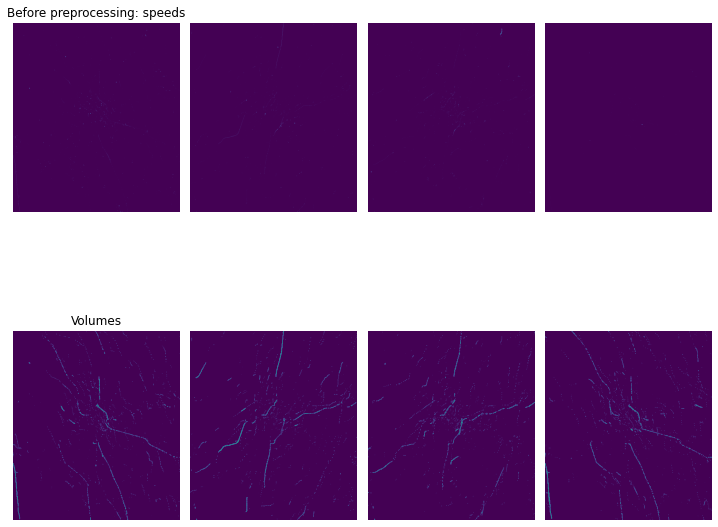

In [9]:

f, axarr = plt.subplots(2,4, figsize=(10,10))
axarr[0,0].imshow(data[155, :, :, 0])
axarr[0,0].set_title('Before preprocessing: speeds')
axarr[0,0].axis('off')
axarr[0,1].imshow(data[155, :, :, 2])
axarr[0,1].axis('off')
axarr[0,2].imshow(data[155, :, :, 4])
axarr[0,2].axis('off')
axarr[0,3].imshow(data[155, :, :, 6])
axarr[0,3].axis('off')
axarr[1,0].set_title('Volumes')
axarr[1,0].imshow(data[155, :, :, 1])
axarr[1,0].axis('off')
axarr[1,1].imshow(data[155, :, :, 3])
axarr[1,1].axis('off')
axarr[1,2].imshow(data[155, :, :, 5])
axarr[1,2].axis('off')
axarr[1,3].imshow(data[155, :, :, 7])
axarr[1,3].axis('off')
f.tight_layout()
plt.show()

In [10]:
import cv2

In [11]:
#concatenate volume channels into one:
img = data[155]
print(img.shape)
speed_avg = (img[:, :, 0] + img[:, :, 2] + img[:, :, 4] + img[:, :, 6]) / 4.0
volume_avg = (img[:, :, 1] + img[:, :, 3] + img[:, :, 5] + img[:, :, 7]) / 4.0
new_image = np.array([speed_avg, volume_avg])
print(new_image.shape)

(495, 436, 8)
(2, 495, 436)


In [12]:
new_image[0].shape

(495, 436)

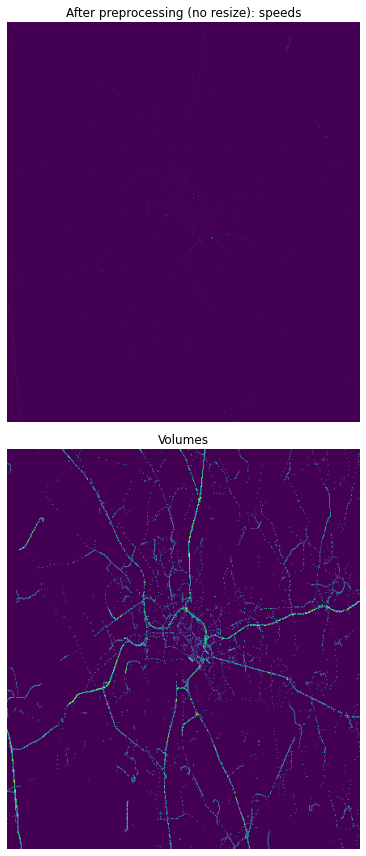

In [13]:
f, axarr = plt.subplots(2,1, figsize=(10,12))
axarr[0].imshow(new_image[0])
axarr[0].set_title('After preprocessing (no resize): speeds')
axarr[0].axis('off')
axarr[1].set_title('Volumes')
axarr[1].imshow(new_image[1])
axarr[1].axis('off')
f.tight_layout()
plt.show()

(2, 200, 200)


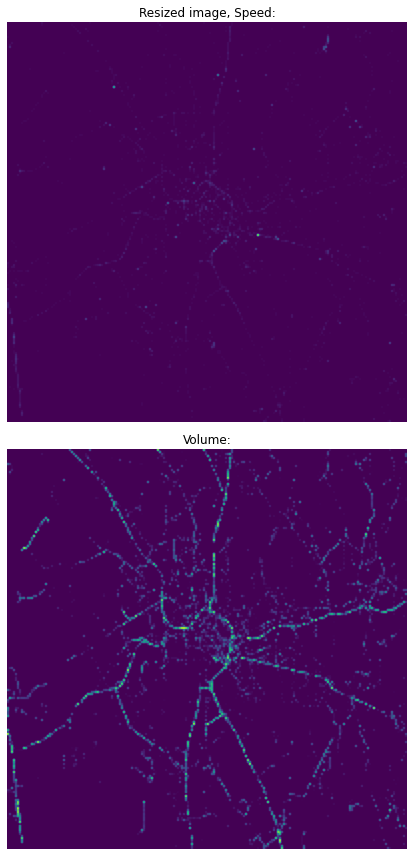

In [84]:
import cv2
#concatenate volume channels into one:
img = data[155]
img = cv2.resize(img, (200, 200), Image.ANTIALIAS)
speed_avg = (img[:, :, 0] + img[:, :, 2] + img[:, :, 4] + img[:, :, 6]) / 4.0
volume_avg = (img[:, :, 1] + img[:, :, 3] + img[:, :, 5] + img[:, :, 7]) / 4.0
new_image = np.array([speed_avg, volume_avg])
print(new_image.shape)
f, axarr = plt.subplots(2,1, figsize=(10,12))
axarr[0].imshow(new_image[0])
axarr[0].set_title('Resized image, Speed:')
axarr[0].axis('off')
axarr[1].set_title('Volume:')
axarr[1].imshow(new_image[1])
axarr[1].axis('off')
f.tight_layout()
plt.show()

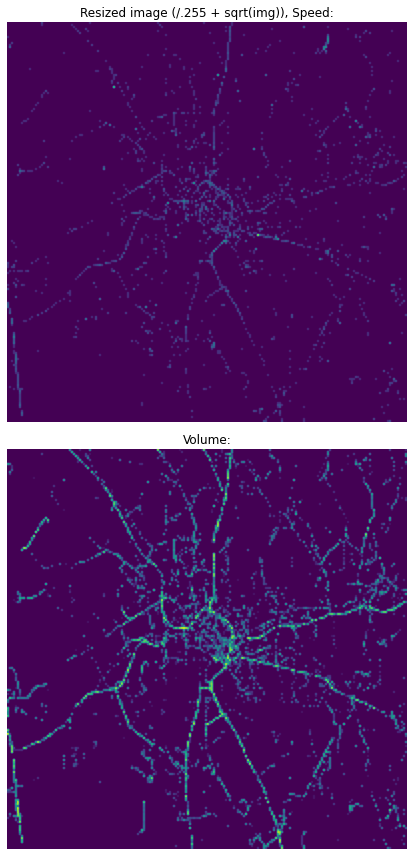

In [85]:
new_image = new_image / 255.
new_image = np.sqrt(new_image)
f, axarr = plt.subplots(2,1, figsize=(10,12))
axarr[0].imshow(new_image[0])
axarr[0].set_title('Resized image (/.255 + sqrt(img)), Speed:')
axarr[0].axis('off')
axarr[1].set_title('Volume:')
axarr[1].imshow(new_image[1])
axarr[1].axis('off')
f.tight_layout()
plt.show()